In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

In [3]:
excel=pd.read_excel('Hr_Analytics.csv')
excel

,EmployeeID,Performance_Score,Feedback Date,Left company,Departure Date,Customer_Feedback,Project_Feedback
0,1,90,2023-02-10,NaN,NaT,5,5
1,2,80,2023-02-12,NaN,NaT,4,3
2,3,85,2023-02-15,NaN,NaT,5,2
3,4,70,2023-02-18,Personal Reasons,2023-01-01,3,5
4,5,75,2023-02-20,Career Advancement,2023-02-01,2,3
5,6,92,2023-02-22,NaN,NaT,5,2
6,7,81,2023-02-25,NaN,NaT,4,1
7,8,88,2023-02-27,NaN,NaT,5,3
8,9,65,2023-03-01,Relocation,2023-03-01,3,4
9,10,77,2023-03-03,NaN,NaT,4,4


In [4]:
excel.shape

(50, 7)

In [5]:
excel.describe()

,EmployeeID,Performance_Score,Feedback Date,Departure Date,Customer_Feedback,Project_Feedback
count,50.00000,50.00000,50,19,50.000000,50.000000
mean,25.50000,81.32000,2023-04-09 12:28:48,2023-05-19 10:06:18.947368448,4.080000,3.200000
min,1.00000,65.00000,2023-02-10 00:00:00,2023-01-01 00:00:00,2.000000,1.000000
25%,13.25000,76.00000,2023-03-10 12:00:00,2023-03-01 00:00:00,3.000000,3.000000
50%,25.50000,81.00000,2023-04-09 00:00:00,2023-05-01 00:00:00,4.000000,3.000000
75%,37.75000,87.75000,2023-05-09 06:00:00,2023-07-16 12:00:00,5.000000,4.000000
max,50.00000,95.00000,2023-06-08 00:00:00,2023-12-01 00:00:00,5.000000,5.000000
std,14.57738,7.45446,NaN,NaN,0.899887,0.947607


In [6]:
excel.isna().any()

EmployeeID           False
Performance_Score    False
Feedback Date        False
Left company          True
Departure Date        True
Customer_Feedback    False
Project_Feedback     False
dtype: bool

In [7]:
#Task Complexity
excel01=excel[['EmployeeID','Performance_Score','Customer_Feedback']]
excel01

,EmployeeID,Performance_Score,Customer_Feedback
0,1,90,5
1,2,80,4
2,3,85,5
3,4,70,3
4,5,75,2
5,6,92,5
6,7,81,4
7,8,88,5
8,9,65,3
9,10,77,4


In [8]:
#Task accuracy
excel02=pd.read_excel('Task Accuracy.xlsx')
excel02

,ProjectID,ProjectName,EmployeeID,StartDate,EndDate,Duration (days),Reviews
0,1,Project Alpha,1,2023-02-01,2024-01-31,365,5
1,2,Project Beta,6,2023-03-01,2024-02-29,365,5
2,3,Project Gamma,13,2023-04-01,2024-03-31,366,5
3,4,Project Delta,19,2023-05-01,2024-04-30,366,5
4,5,Project Epsilon,22,2023-06-01,2024-05-31,366,5
5,6,Project Zeta,34,2023-07-01,2024-06-30,366,5
6,7,Project Eta,44,2023-08-01,2024-07-31,366,5
7,8,Project Theta,50,2023-09-01,2024-08-31,366,5
8,9,Project Iota,2,2023-02-15,2024-01-14,335,4
9,10,Project Kappa,3,2023-03-15,2024-02-14,336,5


<Axes: ylabel='Reviews'>

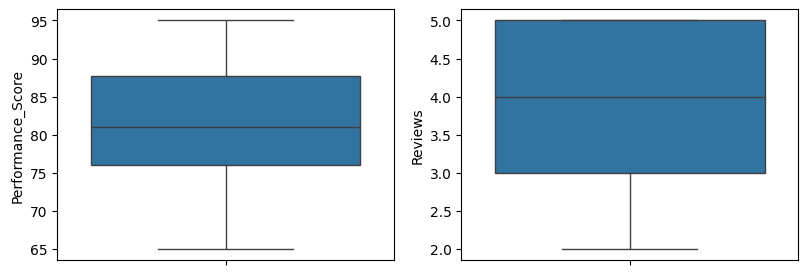

In [9]:
#outlier detection
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(excel01['Performance_Score'])

plt.subplot(4,4,2)
sns.boxplot(excel02['Reviews'])

In [10]:
excel01

,EmployeeID,Performance_Score,Customer_Feedback
0,1,90,5
1,2,80,4
2,3,85,5
3,4,70,3
4,5,75,2
5,6,92,5
6,7,81,4
7,8,88,5
8,9,65,3
9,10,77,4


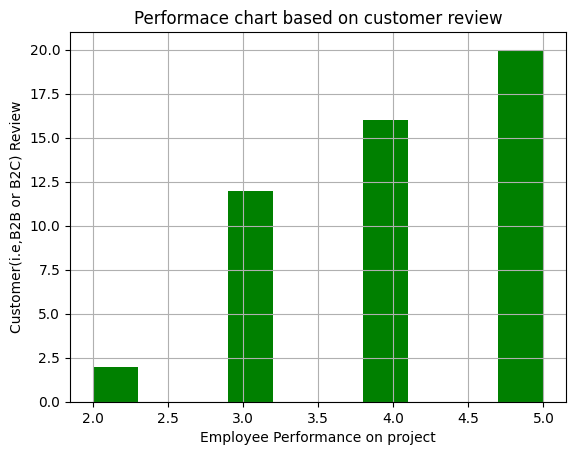

In [11]:
# Task Accuracy bar plot for task complexity
from matplotlib import pyplot as plt
plt.hist(excel01['Customer_Feedback'],bins=10,color="g")
plt.title('Performace chart based on customer review')
plt.xlabel('Employee Performance on project')
plt.ylabel('Customer(i.e,B2B or B2C) Review')
plt.grid(True)
plt.show()

In [12]:
#excel01
from sklearn.model_selection import train_test_split
x=excel01.drop(['Performance_Score'],axis=1)
y=excel01['Customer_Feedback']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
# create a gaussion classifier
model=GaussianNB()

In [15]:
model.fit(x_train,y_train)

GaussianNB()

In [16]:
predict=model.predict(x_test)

In [17]:
print("Prdiction values are:",predict)

Prdiction values are: [3 5 5 4 5 4 3 5 5 4]


In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predict))

Accuracy: 1.0


In [19]:
excel02

,ProjectID,ProjectName,EmployeeID,StartDate,EndDate,Duration (days),Reviews
0,1,Project Alpha,1,2023-02-01,2024-01-31,365,5
1,2,Project Beta,6,2023-03-01,2024-02-29,365,5
2,3,Project Gamma,13,2023-04-01,2024-03-31,366,5
3,4,Project Delta,19,2023-05-01,2024-04-30,366,5
4,5,Project Epsilon,22,2023-06-01,2024-05-31,366,5
5,6,Project Zeta,34,2023-07-01,2024-06-30,366,5
6,7,Project Eta,44,2023-08-01,2024-07-31,366,5
7,8,Project Theta,50,2023-09-01,2024-08-31,366,5
8,9,Project Iota,2,2023-02-15,2024-01-14,335,4
9,10,Project Kappa,3,2023-03-15,2024-02-14,336,5


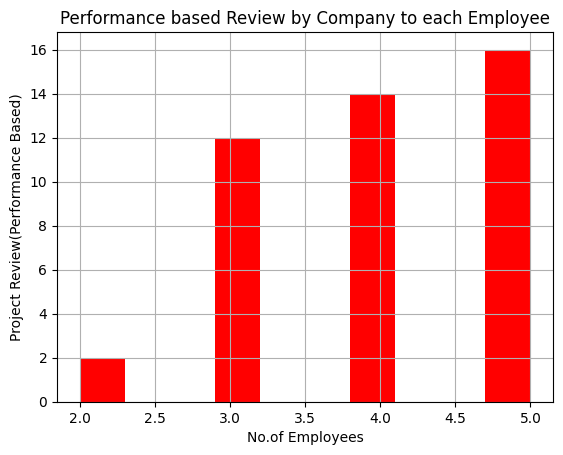

In [20]:
from matplotlib import pyplot as plt
plt.hist(excel02['Reviews'],bins=10,color="r")
plt.title('Performance based Review by Company to each Employee')
plt.xlabel('No.of Employees')
plt.ylabel('Project Review(Performance Based)')
plt.grid(True)
plt.show()